# Titanic: eu sobreviveria?
--------------
## Descrição das colunas

#### pclass
- classe econômica

#### survived
  - sobrevivente (falso = 0, verdadeiro = 1)
  
#### name 
  - nome do passageiro
  
#### sex
  - sexo
  
#### age 
  - idade
  
#### sibsp
  - A coluna "sibsp" na base de dados do Titanic representa o número de irmãos e/ou cônjuges a bordo do navio para cada passageiro. O termo "SibSp" é uma abreviação em inglês para "brothers" (irmãos) e "spouses" (cônjuges).
  - Essa informação pode ser útil para entender a estrutura familiar dos passageiros a bordo do navio e para investigar se a presença de parentes ou cônjuges teve alguma relação com a probabilidade de sobrevivência. Por exemplo, pode-se investigar se os passageiros que estavam acompanhados de seus familiares tiveram mais ou menos chances de sobreviver do que aqueles que estavam viajando sozinhos. Além disso, pode ser usada para fazer análises sobre a distribuição demográfica dos passageiros com base em sua estrutura familiar.
  
#### parch
  - A coluna "parch" na base de dados do Titanic representa o número de pais ou filhos a bordo do navio para cada passageiro. "Parch" é uma sigla em inglês que significa "Parents and Children".
  - Essa informação pode ser útil para análises sobre a composição familiar dos passageiros a bordo do Titanic e para entender se a presença de pais ou filhos afetou as chances de sobrevivência. Por exemplo, pode-se investigar se passageiros que viajavam com suas famílias tiveram mais ou menos chance de sobreviver do que aqueles que viajavam sozinhos.

#### ticket
  - A coluna "ticket" na base de dados do Titanic representa o número de bilhete do passageiro. Cada bilhete emitido para o Titanic tinha um número único, que é registrado nessa coluna.
  - Essa informação pode ser útil para identificar grupos de passageiros que viajaram juntos, já que pessoas que compraram bilhetes próximos podem ter sido alocadas em cabines próximas. Além disso, pode ser usada para analisar se o número do bilhete ou a classe de passagem estão relacionados com a probabilidade de sobrevivência dos passageiros.

#### fare
  - A coluna "fare" na base de dados do Titanic representa o valor da tarifa paga pelo passageiro para viajar no navio. Essa coluna contém informações sobre o custo do bilhete, que variava dependendo da classe de passageiro, localização da cabine e outros fatores.
  - A informação de tarifa pode ser útil para análises relacionadas ao poder aquisitivo dos passageiros e se a classe econômica ou o preço do bilhete tiveram alguma influência na probabilidade de sobrevivência. Por exemplo, pode-se investigar se os passageiros que pagaram mais por seus bilhetes tiveram mais chances de sobreviver do que aqueles que pagaram menos.

#### cabin
  - A coluna "cabin" na base de dados do Titanic representa o número de cabine do passageiro, caso ele tenha sido alocado em uma.
  - Essa coluna é preenchida apenas para os passageiros que tinham uma cabine atribuída a eles e, portanto, é deixada em branco para os passageiros que não tinham uma cabine designada. É importante notar que muitos passageiros da terceira classe não tinham cabines atribuídas e estavam alojados em áreas comuns do navio.
  - A informação na coluna "cabin" pode ser útil para entender a localização dos passageiros no navio e para investigar se a posição da cabine teve alguma relação com a probabilidade de sobrevivência. Além disso, pode ser usada para fazer análises sobre as características dos passageiros com base em sua classe de cabine e outros fatores.

#### embarked
  - A coluna "embarked" na base de dados do Titanic representa o porto de embarque do passageiro. Existem três possíveis valores para essa coluna: "S" para Southampton, "C" para Cherbourg e "Q" para Queenstown.
  - Essa informação pode ser útil para entender a distribuição geográfica dos passageiros e se a localização do porto de embarque teve alguma relação com a probabilidade de sobrevivência. Por exemplo, pode-se investigar se os passageiros que embarcaram em um determinado porto tiveram mais ou menos chances de sobreviver do que aqueles que embarcaram em outro porto. Além disso, pode-se usar essa informação para fazer análises demográficas dos passageiros com base em sua região de origem.

#### boat
  - A coluna "boat" na base de dados do Titanic representa o número do barco salva-vidas atribuído ao passageiro, caso ele tenha sido resgatado com vida.
  - Essa coluna é preenchida apenas para os passageiros que sobreviveram ao naufrágio e foram resgatados em algum dos barcos salva-vidas. Para os passageiros que não sobreviveram, ou para os sobreviventes que não foram resgatados por barcos salva-vidas, essa coluna é deixada em branco.
  - A informação na coluna "boat" pode ser útil para entender como os passageiros foram resgatados e se havia alguma relação entre a localização dos barcos salva-vidas e a probabilidade de sobrevivência. Além disso, pode ser usada para fazer análises sobre as características dos passageiros que foram resgatados, como idade, sexo, classe de passagem e outros fatores.

#### body (corpo)
  - A coluna "body" na base de dados do Titanic representa o número da pessoa, caso ela tenha sido encontrada e identificada, que corresponde ao corpo recuperado após o naufrágio.
  - Essa coluna é preenchida apenas para os passageiros que morreram durante o naufrágio e tiveram seus corpos recuperados. Para os passageiros que sobreviveram, ou para os passageiros que morreram e não tiveram seus corpos recuperados, essa coluna é deixada em branco.
  - A informação na coluna "body" pode ser usada para entender o número de vítimas fatais do naufrágio e para identificar as pessoas que morreram. Além disso, pode ser usada para fazer análises sobre as características dos passageiros que morreram, como idade, sexo, classe de passagem e outros fatores.
-------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_selection import RFE

from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_excel(r'titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


#### Observações
  - Havia 1309 passageiros no Titanic
  - Poucos passageiros possuiam cabines designadas
  - Me pergunto se o lugar de embarque e destino "home.dest" teria alguma relação com os sobreviventes, talvez devido que pode ter influenciado na ordem de embarque e posição dentro do navio, podendo obter um lugar "desprivilegiado", se houver essa distinção.

#### Ações
  - Os nomes dos passageiros não será relevante para a classificação de sobreviventes, serão excluídos.
  - Números inteiro de 0 e 1 para os sexos.

In [4]:
# get dummies
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# drop names
df.drop(['name'], axis=1, inplace=True)

In [5]:
# transformando a coluna em inteiro
df['sex_male'] = df['sex_male'].astype(int)
df['sex_male'].dtypes

dtype('int32')

- Feminino = 0
- Masculino = 1

In [6]:
# excluindo coluna "body"
df.drop('body', axis=1, inplace=True)

## Análise de Dados

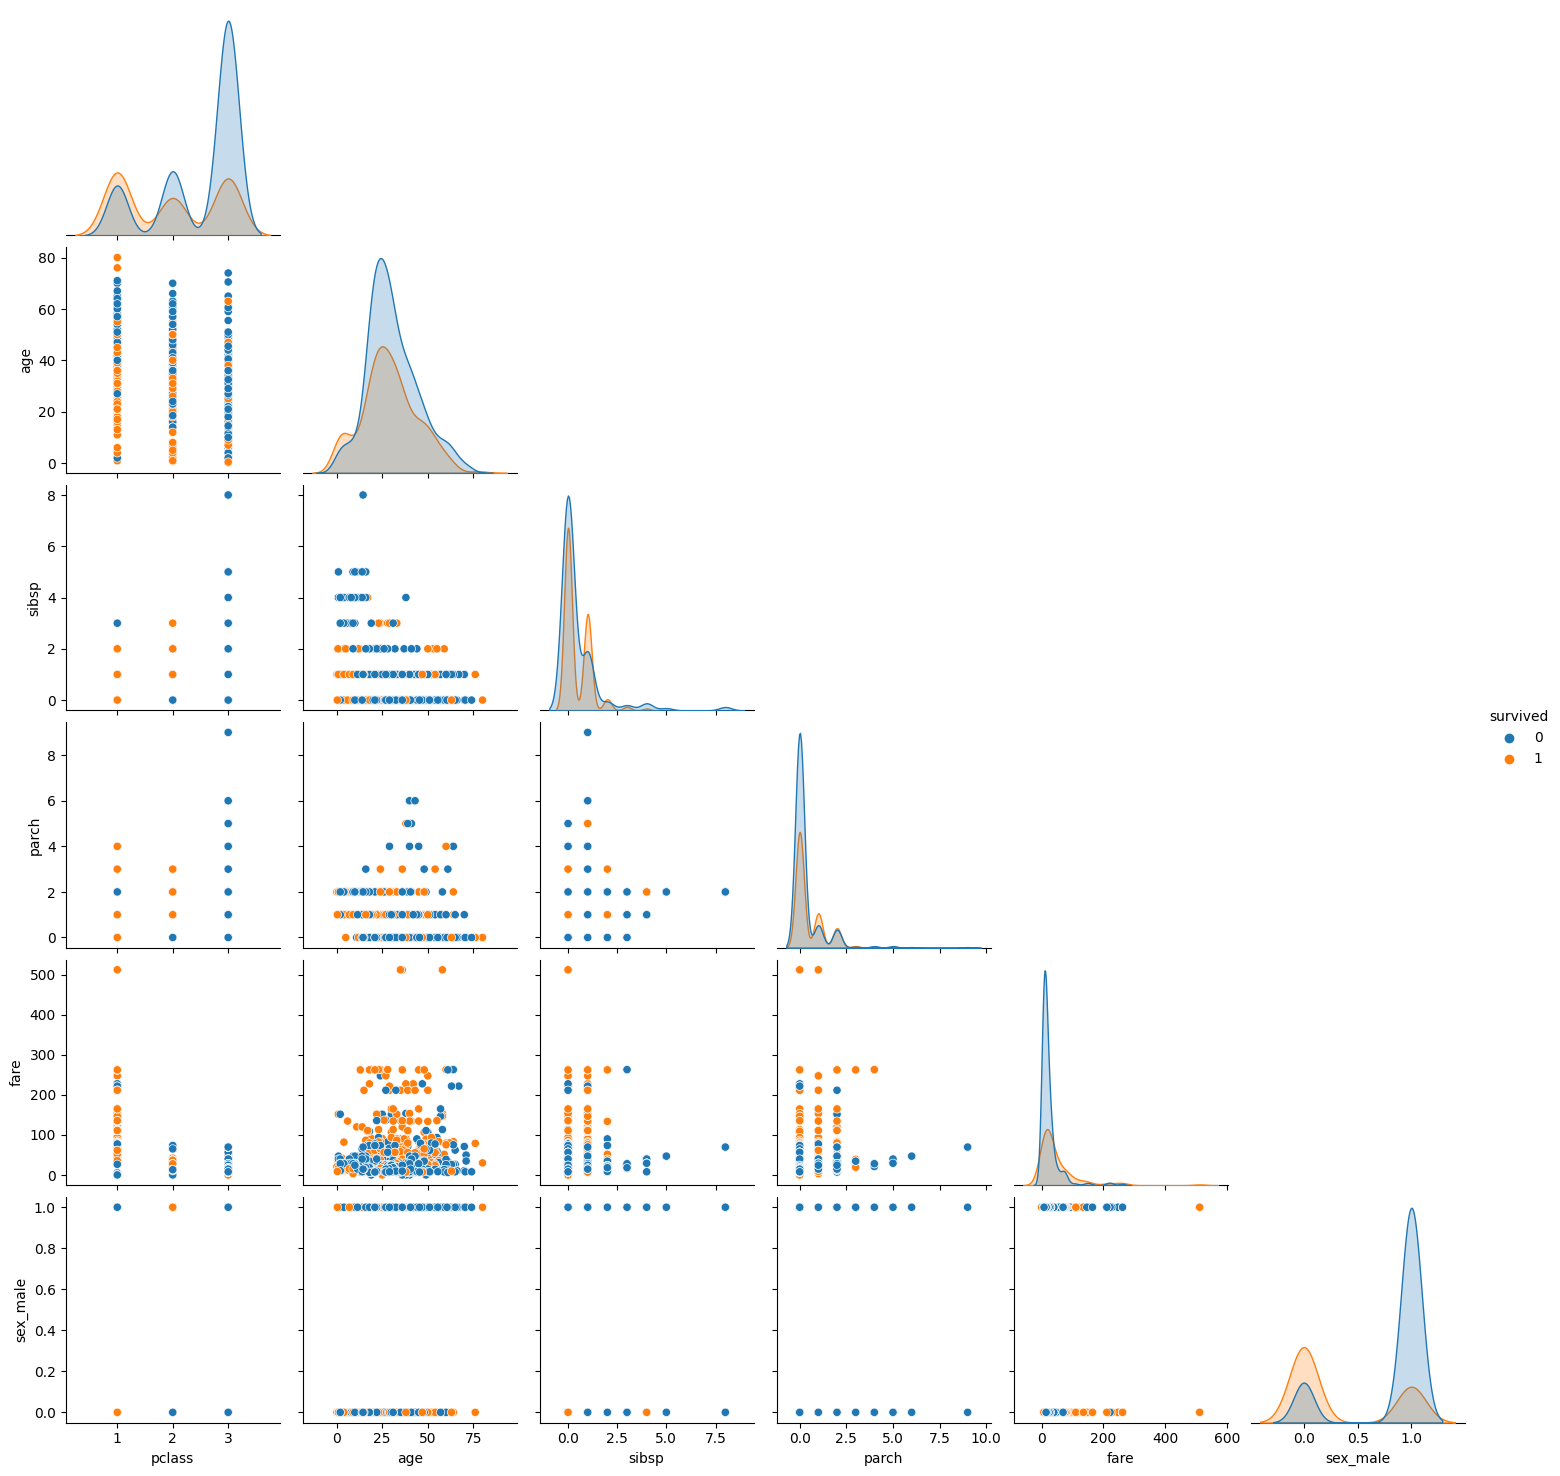

In [7]:
sns.pairplot(data=df, hue='survived', corner=True);

#### Observações através das distribuições normais
  - Aqueles que estavam na terceira classe foram os que mais morreram;
  - Pessoas mais velhas aparentemente tinham mais chance de morrer;
  - Pessoas com cônjugues/irmãos/parentes aparentemente tinham mais chance de morrer;
  - Pessoas do sexo masculino morreram mais;
  - Pela coluna "fare" observa-se que, aparentemente, aqueles que pagaram mais caro pela passagem possuíram mais chance de sobreviver.

#### Observações através das relações das distribuições de pontos
  - A relação "fare x age" mostra que pessoas que pagaram mais possuem mais chance de sobreviver, o que converge com a distribuição normal "pclass"
  - body só serve para identificar os mortos, não faz sentido estar na análise
  
#### Ações
  - Um swarmplot pode ajudar a entender melhor a distribuição da "pclass", "parch" e "age";
  - Calcular o percentual de mortos;

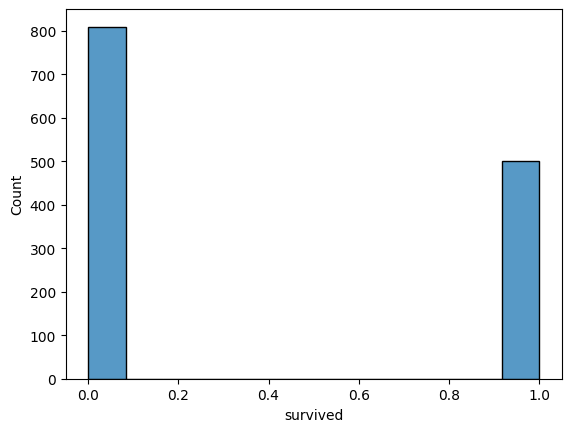

In [8]:
sns.histplot(data=df, x='survived');

In [9]:
pct_mortes = len(df['survived'][df['survived']==0])/len(df['survived'])
print(f'Percentual de mortes no Titanic: {pct_mortes:.2%}')

Percentual de mortes no Titanic: 61.80%


In [10]:
len(df['survived']), len(df['survived'][df['survived']==0])

(1309, 809)

61,8% dos passageiros e tripulantes do navio faleceram, um número muito alto.

O que resta agora é investigar mais o que está relacionado a esse número de mortes.

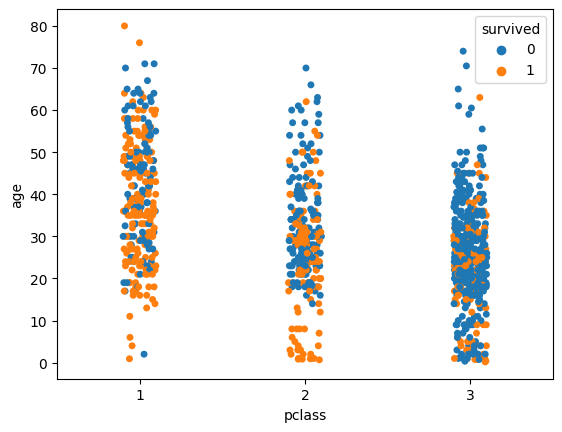

In [11]:
sns.stripplot(data=df, x='pclass', y='age', hue='survived');

O stripplot acima permite visulizar melhor que a maioria das mortes ocorreram com aqueles que viajaram de terceira classe (classe mais econômica) e o comportamento ocorre inverso a primeira classe. Dessa forma, pode-se dizer que a classe e local influenciou diretamente na sobrevivência ou não dos passageiros.

Além disso, aparentemente os mais jóvens da segunda e terceira classe tiveram mais chance de sobreviver do que os mais velhos.

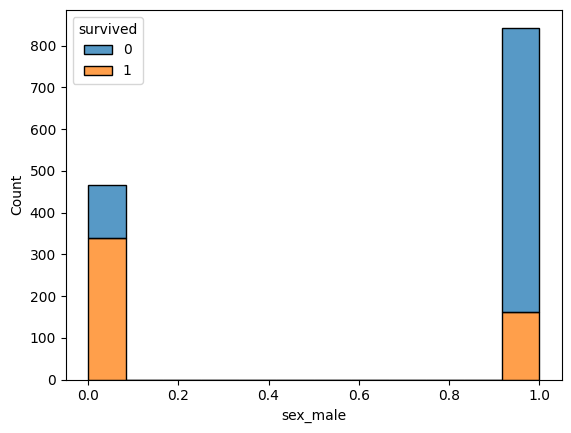

In [12]:
sns.histplot(data=df, x='sex_male', multiple='stack', hue='survived');

O histograma acima é feito para visualizar de forma mais clara de que mulheres sobreviveram mais do que homens.

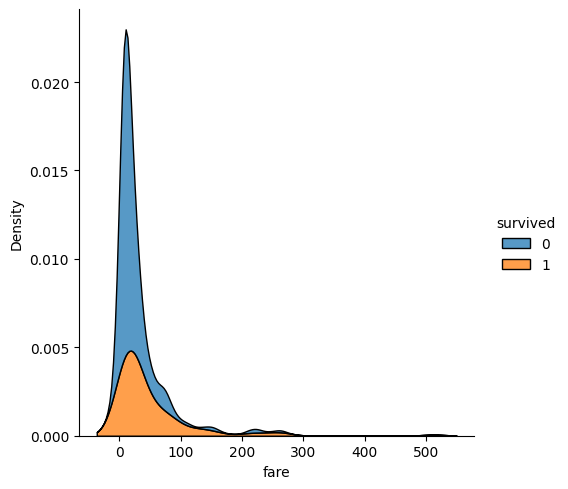

In [13]:
sns.displot(data=df, x='fare', hue='survived', multiple='stack', kind='kde');

O gráfico acima mostra uma grande concentração de mortos em valores de passagem iguais ou parecidas (provavelmente da terceira classe) e com concentrações significativamente menor que a anterior para os valores de passagem para os sobreviente.

Apesar dessa informação ser verdadeira nesse ponto de vista, é provável que houvesse números maiores de passageiros na terceira classe do que na segunda e na terceira, fato que deverá ser comprovada através de histogramas. Isso implica diretamente com o gráfico stripplot analisado anterioremente, que visualmente, diz que os da terceira classe tiveram menos chance de sobreviver.

Cálculos de probabilidade e uma análise da quantidade de pessoas por classe e sexo pode validar as análises. 

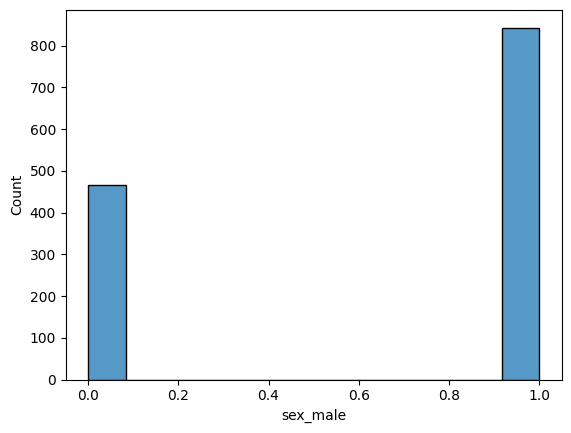

In [14]:
sns.histplot(data=df, x='sex_male');

In [15]:
pct_male = len(df['sex_male'][df['sex_male']==1]) / len(df['sex_male'])
pct_female = 1 - pct_male

print(f'Passageiros:\n\
Homens: {pct_male:.2%}\n\
Mulheres: {pct_female:.2%}')

Passageiros:
Homens: 64.40%
Mulheres: 35.60%


#### Observações
  - Homens foram os que mais morreram mas também são a maioria, o que se supor 50% de chance de qualquer um sobreviver, é esperado que homens morram mais. No entanto, sabe-se que a prioridade no Titanic eram mulheres e crianças, o que pode ter acarretado na morte de mais homens do que deveria.
  
#### Ações
  - Achar o percentual de morte dos homens comparado ao total de homens e os de mulheres comparado ao total das mulheres. Com isso, comprovar que as chances de morte como homem é maior que de mulheres.

In [16]:
# análise para sobrevivência dos homens
death_male = len(df['sex_male'][(df['sex_male']==1) & (df['survived']==0)])
total_male = len(df['sex_male'][(df['sex_male']==1)])
pct_death_male = death_male/total_male

# análise para sobrevivência das mulheres
death_female = len(df['sex_male'][(df['sex_male']==0) & (df['survived']==0)])
total_female = len(df['sex_male'][(df['sex_male']==0)])
pct_death_female = death_female/total_female

print(f'Percentual de mortes por sexo:\n\
Homens: {pct_death_male:.2%}\n\
Mulheres: {pct_death_female:.2%}')

Percentual de mortes por sexo:
Homens: 80.90%
Mulheres: 27.25%


#### Observações
  - Através da análise do percentual de mortes para homens e mulheres, percebe-se que os quase 81% dos homens que estavam no navio morreram um valor extremamente alto e muito maior que o percentual para as mulheres, que foi de 27,25%.
  
#### Ações
  - Calcular o percentual de passageiros mortos por classe;

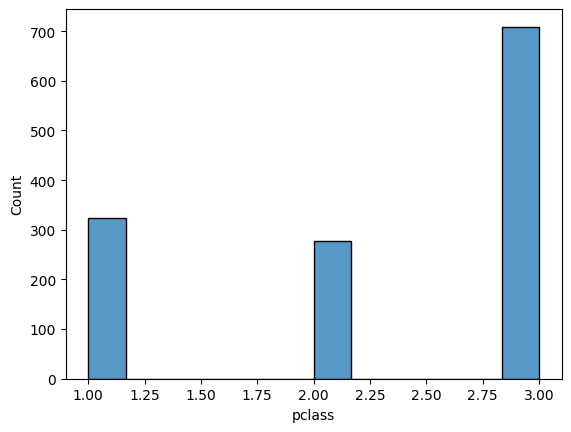

In [17]:
sns.histplot(data=df, x='pclass');

In [18]:
pct_three = len(df['pclass'][df['pclass']==3]) / len(df['pclass'])
pct_two = len(df['pclass'][df['pclass']==2]) / len(df['pclass'])
pct_one = 1 - (pct_three + pct_two)

print(f'Passageiros pro classe:\n\
Primeira classe: {pct_one:.2%}\n\
Segunda classe: {pct_two:.2%}\n\
Terceira classe: {pct_three:.2%}')

Passageiros pro classe:
Primeira classe: 24.68%
Segunda classe: 21.16%
Terceira classe: 54.16%


In [19]:
pct_three_death = len(df['pclass'][(df['pclass']==3) & (df['survived']==0)]) / len(df['pclass'][df['pclass']==3])
pct_two_death = len(df['pclass'][(df['pclass']==2) & (df['survived']==0)]) / len(df['pclass'][df['pclass']==2])
pct_one_death = len(df['pclass'][(df['pclass']==1) & (df['survived']==0)]) / len(df['pclass'][df['pclass']==1])

print(f'Percentual de mortes por classe:\n\
Primeira classe: {pct_one_death:.2%}\n\
Segunda classe: {pct_two_death:.2%}\n\
Terceira classe: {pct_three_death:.2%}')

Percentual de mortes por classe:
Primeira classe: 38.08%
Segunda classe: 57.04%
Terceira classe: 74.47%


In [20]:
pct_three_death_male = len(df['pclass'][(df['pclass']==3) & (df['survived']==0) & (df['sex_male']==1)]) / len(df['pclass'][(df['pclass']==3) & (df['sex_male']==1)])
pct_two_death_male = len(df['pclass'][(df['pclass']==2) & (df['survived']==0) & (df['sex_male']==1)]) / len(df['pclass'][(df['pclass']==2) & (df['sex_male']==1)])
pct_one_death_male = len(df['pclass'][(df['pclass']==1) & (df['survived']==0) & (df['sex_male']==1)]) / len(df['pclass'][(df['pclass']==1) & (df['sex_male']==1)])

print(f'Percentual de mortes de homens por classe:\n\
Primeira classe: {pct_one_death_male:.2%}\n\
Segunda classe: {pct_two_death_male:.2%}\n\
Terceira classe: {pct_three_death_male:.2%}')

Percentual de mortes de homens por classe:
Primeira classe: 65.92%
Segunda classe: 85.38%
Terceira classe: 84.79%


In [21]:
pct_three_death_female = len(df['pclass'][(df['pclass']==3) & (df['survived']==0) & (df['sex_male']==0)]) / len(df['pclass'][(df['pclass']==3) & (df['sex_male']==0)])
pct_two_death_female = len(df['pclass'][(df['pclass']==2) & (df['survived']==0) & (df['sex_male']==0)]) / len(df['pclass'][(df['pclass']==2) & (df['sex_male']==0)])
pct_one_death_female = len(df['pclass'][(df['pclass']==1) & (df['survived']==0) & (df['sex_male']==0)]) / len(df['pclass'][(df['pclass']==1) & (df['sex_male']==0)])

print(f'Percentual de mortes de mulheres por classe:\n\
Primeira classe: {pct_one_death_female:.2%}\n\
Segunda classe: {pct_two_death_female:.2%}\n\
Terceira classe: {pct_three_death_female:.2%}')

Percentual de mortes de mulheres por classe:
Primeira classe: 3.47%
Segunda classe: 11.32%
Terceira classe: 50.93%


#### Observações
  - Quanto mais econômica a classe, menor a chance de sobrevivência;
  - Aparentemente, para os homens da segunda classe, houve uma chance de sobrevivência um pouco menor que para os da terceira, comportamento inesperado visto a visão geral da chance de sobrevivência por classe;
  - Homens da primeira classe são os que mais tem chance de sobreviver, porém as chances de sobrevivência ainda é baixa;
  - Mulheres da primeira classe possuem uma alta probabilidade de viver, assim como as da segunda (probabilidade um pouco menor de viver);
  - As mulheres da terceira classe possuem uma chance de aproximadamente de 50% para viver ou morrer;
  
#### Ações
  - Analisar a chance de sobrevivência de acordo com a idade dos passageiros;

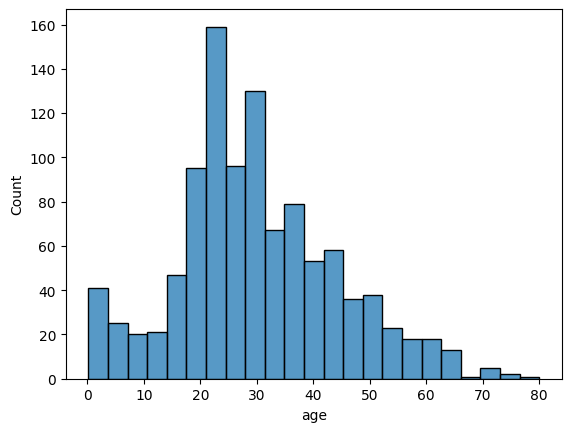

In [22]:
sns.histplot(data=df, x='age');

Como há uma variedade de idades, será divido as idades em cinco grupos, tais como:
 - Infância: age < 11
 - Adolescência/Juventude: 11 <= age < 20
 - Adulto jóvem: 21 <= age < 40
 - Adulto meia idade: 40 <= age < 65
 - Velhice: age >= 65

In [23]:
# criação das faixas etárias
for i, age in enumerate(df['age']):
    if age < 11:
        df.loc[i, 'age_class'] = 'inf'
    elif (age >= 11) and (age < 20):
        df.loc[i, 'age_class'] = 'adol_juv'
    elif (age >= 21) and (age < 40):
        df.loc[i, 'age_class'] = 'adul_jov'
    elif (age >= 40) and (age < 65):
        df.loc[i, 'age_class'] = 'meia_id'
    elif age >= 65:
        df.loc[i, 'age_class'] = 'velhice'
    else:
        pass

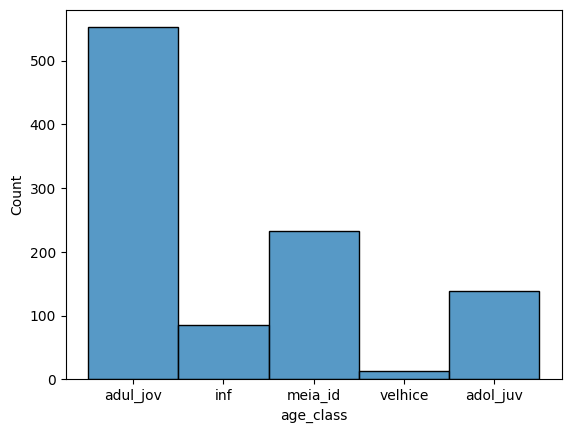

In [24]:
sns.histplot(data=df, x='age_class');

In [25]:
np.mean(df['age'])

29.8811345124283

#### Observações:
 - Adultos jóvens eram a maioria, em seguida adultos na meia idade;
 - Havia poucos idosos no navio, mas um número considerável de adolesncente e crianças;
 - A média de idade das pessoas no Titanic era de aproximadamente 30 anos.

#### Ações:
 - Probabilidade de não sobreviver por faixa etária;

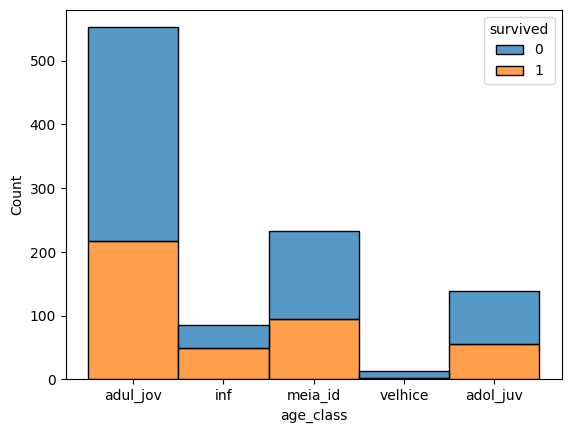

In [26]:
sns.histplot(data=df, x='age_class', multiple='stack', hue='survived');

In [27]:
pct_death_inf = len(df['age_class'][(df['age_class']=='inf') & (df['survived']==0)]) / len(df['age_class'][df['age_class']=='inf'])
pct_death_adol_juv = len(df['age_class'][(df['age_class']=='adol_juv') & (df['survived']==0)]) / len(df['age_class'][df['age_class']=='adol_juv'])
pct_death_adul_jov = len(df['age_class'][(df['age_class']=='adul_jov') & (df['survived']==0)]) / len(df['age_class'][df['age_class']=='adul_jov'])
pct_death_meia_id = len(df['age_class'][(df['age_class']=='meia_id') & (df['survived']==0)]) / len(df['age_class'][df['age_class']=='meia_id'])
pct_death_velhice = len(df['age_class'][(df['age_class']=='velhice') & (df['survived']==0)]) / len(df['age_class'][df['age_class']=='velhice'])

print(f'Percentual de mortes por facha etária:\n\
Infância: {pct_death_inf:.2%}\n\
Adolescente/Juventude: {pct_death_adol_juv:.2%}\n\
Adulto jóvem: {pct_death_adul_jov:.2%}\n\
Adulto meia idade: {pct_death_meia_id:.2%}\n\
Velhice: {pct_death_velhice:.2%}')

Percentual de mortes por facha etária:
Infância: 41.86%
Adolescente/Juventude: 59.71%
Adulto jóvem: 60.69%
Adulto meia idade: 59.48%
Velhice: 84.62%


In [28]:
print(f'Média e desvio de percentual de mortes dos adolecentes, adultos jovens e meia idade:\n\
{np.mean([pct_death_adol_juv, pct_death_adul_jov, pct_death_meia_id]):.2%} ±{np.std([pct_death_adol_juv, pct_death_adul_jov, pct_death_meia_id]):.2%}')

Média e desvio de percentual de mortes dos adolecentes, adultos jovens e meia idade:
59.96% ±0.52%


#### Observações:
 - Pessoas na faixa etária da infância são os que mais possuem chance de sobrevivência e provavelmente receberam prioridade na hora do embarque;
 - Idosos foram os que menos tiveram chance de sobrevivência, com um percentual de mortes elevada próxima a 85%. Possivelmente pelas limitações da idade em relação ao porte físico em meio as adversidades do acidente;
 - Pessoas nas três faixas etárias "Adolescente/Juventude, Adulto jóvem e Adulto meia idade" possuíram percentuais de mortes praticamente iguais e com um desvio padrão muito pequeno entre elas. Dessa forma, pode-se afirmar que adultos e adolescente, que são pessoas mais desenvolvidas fisicamente e sem limitações físicas no geral, receberam a mesma prioridade no salvamento dos botes (visando a idade, claro) e possuíram a memsa chance de sobreviver, por isso, serão considerados de mesma classe.

#### Ações:
 - Considerar as classes "Adolescente/Juventude, Adulto jóvem e Adulto meia idade" a mesma classe "Adol/Adul"
 - Realizar a análise de sobrevivência filtrando idade, sexo e classe econômica.

In [29]:
for i, age in enumerate(df['age_class']):
    if (age != 'inf') and (age != 'velhice'):
        df.loc[i, 'age_class'] = 'adol/adul'
df['age_class'].unique()

array(['adol/adul', 'inf', 'velhice'], dtype=object)

In [30]:
fil_male_inf_one = (df['sex_male']==1) & (df['age_class']=='inf') & (df['pclass']==1)
fil_male_inf_two = (df['sex_male']==1) & (df['age_class']=='inf') & (df['pclass']==2)
fil_male_inf_three = (df['sex_male']==1) & (df['age_class']=='inf') & (df['pclass']==3)

fil_female_inf_one = (df['sex_male']==0) & (df['age_class']=='inf') & (df['pclass']==1)
fil_female_inf_two = (df['sex_male']==0) & (df['age_class']=='inf') & (df['pclass']==2)
fil_female_inf_three = (df['sex_male']==0) & (df['age_class']=='inf') & (df['pclass']==3)

fil_male_adoladul_one = (df['sex_male']==1) & (df['age_class']=='adol/adul') & (df['pclass']==1)
fil_male_adoladul_two = (df['sex_male']==1) & (df['age_class']=='adol/adul') & (df['pclass']==2)
fil_male_adoladul_three = (df['sex_male']==1) & (df['age_class']=='adol/adul') & (df['pclass']==3)

fil_female_adoladul_one = (df['sex_male']==0) & (df['age_class']=='adol/adul') & (df['pclass']==1)
fil_female_adoladul_two = (df['sex_male']==0) & (df['age_class']=='adol/adul') & (df['pclass']==2)
fil_female_adoladul_three = (df['sex_male']==0) & (df['age_class']=='adol/adul') & (df['pclass']==3)

fil_male_velhice_one = (df['sex_male']==1) & (df['age_class']=='velhice') & (df['pclass']==1)
fil_male_velhice_two = (df['sex_male']==1) & (df['age_class']=='velhice') & (df['pclass']==2)
fil_male_velhice_three = (df['sex_male']==1) & (df['age_class']=='velhice') & (df['pclass']==3)

fil_female_velhice_one = (df['sex_male']==0) & (df['age_class']=='velhice') & (df['pclass']==1)
fil_female_velhice_two = (df['sex_male']==0) & (df['age_class']=='velhice') & (df['pclass']==2)
fil_female_velhice_three = (df['sex_male']==0) & (df['age_class']=='velhice') & (df['pclass']==3)

In [31]:
pct_male_inf_one = len(df['survived'][fil_male_inf_one & (df['survived']==0)]) / len(df['survived'][fil_male_inf_one])
pct_male_inf_two = len(df['survived'][fil_male_inf_two & (df['survived']==0)]) / len(df['survived'][fil_male_inf_two])
pct_male_inf_three = len(df['survived'][fil_male_inf_three & (df['survived']==0)]) / len(df['survived'][fil_male_inf_three])

pct_female_inf_one = len(df['survived'][fil_female_inf_one & (df['survived']==0)]) / len(df['survived'][fil_female_inf_one])
pct_female_inf_two = len(df['survived'][fil_female_inf_two & (df['survived']==0)]) / len(df['survived'][fil_female_inf_two])
pct_female_inf_three = len(df['survived'][fil_female_inf_three & (df['survived']==0)]) / len(df['survived'][fil_female_inf_three])

pct_male_adoladul_one = len(df['survived'][fil_male_adoladul_one & (df['survived']==0)]) / len(df['survived'][fil_male_adoladul_one])
pct_male_adoladul_two = len(df['survived'][fil_male_adoladul_two & (df['survived']==0)]) / len(df['survived'][fil_male_adoladul_two])
pct_male_adoladul_three = len(df['survived'][fil_male_adoladul_three & (df['survived']==0)]) / len(df['survived'][fil_male_adoladul_three])

pct_female_adoladul_one = len(df['survived'][fil_female_adoladul_one & (df['survived']==0)]) / len(df['survived'][fil_female_adoladul_one])
pct_female_adoladul_two = len(df['survived'][fil_female_adoladul_two & (df['survived']==0)]) / len(df['survived'][fil_female_adoladul_two])
pct_female_adoladul_three = len(df['survived'][fil_female_adoladul_three & (df['survived']==0)]) / len(df['survived'][fil_female_adoladul_three])

pct_male_velhice_one = len(df['survived'][fil_male_velhice_one & (df['survived']==0)]) / len(df['survived'][fil_male_velhice_one])
pct_male_velhice_two = len(df['survived'][fil_male_velhice_two & (df['survived']==0)]) / len(df['survived'][fil_male_velhice_two])
pct_male_velhice_three = len(df['survived'][fil_male_velhice_three & (df['survived']==0)]) / len(df['survived'][fil_male_velhice_three])

pct_female_velhice_one = len(df['survived'][fil_female_velhice_one & (df['survived']==0)]) / len(df['survived'][fil_female_velhice_one])
#pct_female_velhice_two = len(df['survived'][fil_female_velhice_two & (df['survived']==0)]) / len(df['survived'][fil_female_velhice_two])
#pct_female_velhice_three = len(df['survived'][fil_female_velhice_three & (df['survived']==0)]) / len(df['survived'][fil_female_velhice_three])

In [32]:
print(f'\n\
pct_male_inf_one: {pct_male_inf_one:.2%}\n\
pct_male_inf_two: {pct_male_inf_two:.2%}\n\
pct_male_inf_three: {pct_male_inf_three:.2%}\n\
pct_female_inf_one: {pct_female_inf_one:.2%}\n\
pct_female_inf_two: {pct_female_inf_two:.2%}\n\
pct_female_inf_three: {pct_female_inf_three:.2%}\n\
pct_male_adoladul_one: {pct_male_adoladul_one:.2%}\n\
pct_male_adoladul_two: {pct_male_adoladul_two:.2%}\n\
pct_male_adoladul_three: {pct_male_adoladul_three:.2%}\n\
pct_female_adoladul_one: {pct_female_adoladul_one:.2%}\n\
pct_female_adoladul_two: {pct_female_adoladul_two:.2%}\n\
pct_female_adoladul_three: {pct_female_adoladul_three:.2%}\n\
pct_male_velhice_one: {pct_male_velhice_one:.2%}\n\
pct_male_velhice_two: {pct_male_velhice_two:.2%}\n\
pct_female_velhice_one: {pct_female_velhice_one:.2%}')


pct_male_inf_one: 0.00%
pct_male_inf_two: 0.00%
pct_male_inf_three: 64.52%
pct_female_inf_one: 100.00%
pct_female_inf_two: 0.00%
pct_female_inf_three: 51.72%
pct_male_adoladul_one: 66.27%
pct_male_adoladul_two: 91.14%
pct_male_adoladul_three: 86.06%
pct_female_adoladul_one: 2.82%
pct_female_adoladul_two: 12.63%
pct_female_adoladul_three: 50.80%
pct_male_velhice_one: 85.71%
pct_male_velhice_two: 100.00%
pct_female_velhice_one: 0.00%


#### Observações:
 - Não havia mulheres idosas na segunda e terceira classe no Titanic;
 - A maioria das mortes infantis aconteceram na terceira classe para ambos os sexos;
 - Para o grupo de adolescente até adultos, onde mais sobreviveram foram as mulheres da primeira classe, seguidamente da segunda classe;
 - As mulheres adultas e adolescente da terceira classe apresentaram um percentual muito elevado comparado a das outras classes;
 - A maior taxa de morte entre os homens adolescentes e adultos está na terceira classe, com 91%, seguidamente da segunda e da terceira;
 - Havia apenas uma mulher idosa a bordo, segundo os dados e ela sobreviveu;
 - No geral, havia poucos idosos, onde mais tinha eram homens na primeira classe, que tiveram um percentual de morte de aproximadamente 86%;
 
    - Dessa forma, pode-se confirmar o impacto desses três filtros nas mortes e relaciona-los diretamente.

#### Ações:
 - Analisar as mortes com os parentes "sibsp" e "parch";

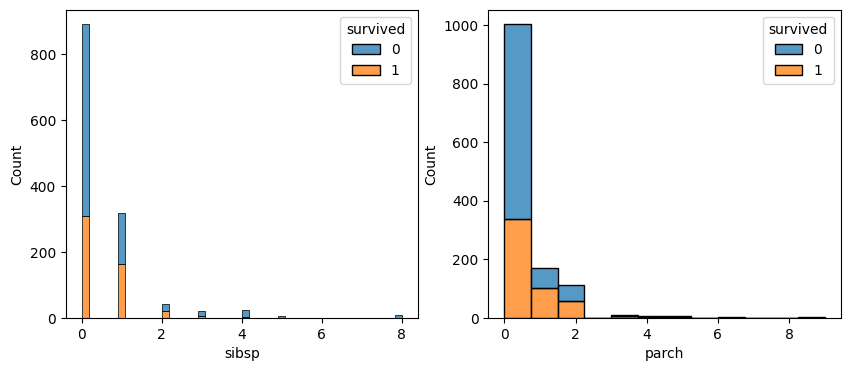

In [33]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x='sibsp', multiple='stack', hue='survived');

plt.subplot(1,2,2)
sns.histplot(data=df, x='parch', multiple='stack', hue='survived');

Ambos informações possuem um comportamento similar, proém, depois de valores maiores que dois as  informações ficam muito escassa pela falta de ocorrência nos dados

In [34]:
pct_sibsp_0 = len(df['sibsp'][(df['sibsp'] == 0) & (df['survived']==0)]) / len(df['sibsp'][(df['sibsp'] == 0)])
pct_sibsp_1 = len(df['sibsp'][(df['sibsp'] == 1) & (df['survived']==0)]) / len(df['sibsp'][(df['sibsp'] == 1)])
pct_sibsp_2 = len(df['sibsp'][(df['sibsp'] == 2) & (df['survived']==0)]) / len(df['sibsp'][(df['sibsp'] == 2)])
                                                                                  
pct_parch_0 = len(df['parch'][(df['parch'] == 0) & (df['survived']==0)]) / len(df['parch'][(df['parch'] == 0)])
pct_parch_1 = len(df['parch'][(df['parch'] == 1) & (df['survived']==0)]) / len(df['parch'][(df['parch'] == 1)])
pct_parch_2 = len(df['parch'][(df['parch'] == 2) & (df['survived']==0)]) / len(df['parch'][(df['parch'] == 2)])

print(f'Percentual de morte por conjugues, irmãos, pais e filhos no Titanic\n\
Nenhum irmão ou conjugue: {pct_sibsp_0:.2%}\n\
Um irmão ou conjugue: {pct_sibsp_1:.2%}\n\
Dois irmãos ou conjugue: {pct_sibsp_2:.2%}\n\n\
Nenhum pais ou filhos: {pct_parch_0:.2%}\n\
Um pais ou filhos: {pct_parch_1:.2%}\n\
Dois pais ou filhos: {pct_parch_2:.2%}')

Percentual de morte por conjugues, irmãos, pais e filhos no Titanic
Nenhum irmão ou conjugue: 65.32%
Um irmão ou conjugue: 48.90%
Dois irmãos ou conjugue: 54.76%

Nenhum pais ou filhos: 66.47%
Um pais ou filhos: 41.18%
Dois pais ou filhos: 49.56%


#### Observações:
 - De certa forma, pode-se dizer que aqueles que estavam completamente sozinhos tinham menos chance de sobrevivência do que aqueles que tinham alguém;
 - Minha hipótese é de que aqueles que estavam sozinhas em alguma adversidade durante o acidente não encontravam ajuda, já aqueles que tinham algum parente, poderiam obter ajuda de seus parentes e ter mais chance de sobreviver. Principalmente as crianças.

#### Ações:
 - Analisar a coluna "fare", tarifca do bilhete, porém, acredito que a relação entre o prço do bilhete e a sobrevivência será igual a das classes, visto que os que pagaram mais foram para classes melhores e os que pagaram menos, para as piores.

C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

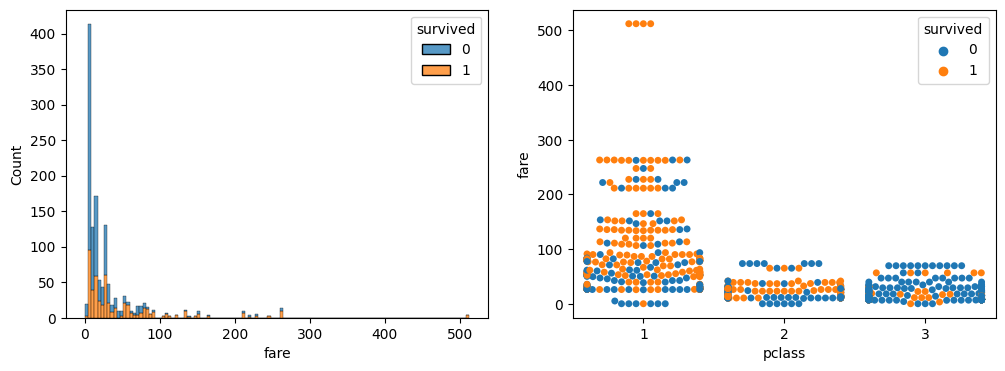

In [35]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x='fare', multiple='stack', hue='survived');

plt.subplot(1,2,2)
sns.swarmplot(data=df, y='fare', x='pclass', hue='survived');

#### Observações:
 - Numa análise visual, aqueles que pagaram menos nas tarifas, foram para a terceira classe e tiveram mais chance de falecer;
 - Os que pagaram mais, foram pra classes melhores e consequentemente tiveram mais chance de sobreviver;
 - "Fare" está diretamente ligada a classe, que está diretamente ligado a chace de sobrevivência;

#### Ações:
 - Todos dados relacionados a sobrevivência estão analisados e todos estão bem relacionados com a chance de sobrevivência;
 - Analisar a relação do local de embarque e da sobrevivência dos passageiros;

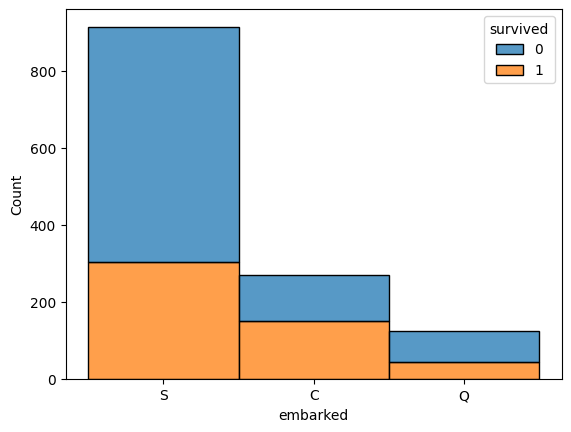

In [36]:
sns.histplot(data=df, x='embarked', multiple='stack', hue='survived');

In [37]:
pct_embarked_S = len(df['embarked'][(df['embarked'] == 'S') & (df['survived']==0)]) / len(df['embarked'][(df['embarked'] == 'S')])
pct_embarked_C = len(df['embarked'][(df['embarked'] == 'C') & (df['survived']==0)]) / len(df['embarked'][(df['embarked'] == 'C')])
pct_embarked_Q = len(df['embarked'][(df['embarked'] == 'Q') & (df['survived']==0)]) / len(df['embarked'][(df['embarked'] == 'Q')])

print(f'Percentual da relação das mortes e local de embarque:\n\
Southampton: {pct_embarked_S:.2%}\n\
Cherbourg: {pct_embarked_C:.2%}\n\
Queenstown: {pct_embarked_Q:.2%}')

Percentual da relação das mortes e local de embarque:
Southampton: 66.74%
Cherbourg: 44.44%
Queenstown: 64.23%


#### Observações:
 - Aparentemente pessoas que embarcaram em "S" e "Q" obtiveram mais chance de não sobreviver, porém, seria interessante analisar a classe econômica apara que a maioria deles foi e também o sexo. No entanto, essa análise basta para ver se tem alguma relação com a sobrevivência

## Limpeza de dados

In [38]:
df.head()

,pclass,survived,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,sex_male,age_class
0,1,1,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO",0,adol/adul
1,1,1,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",1,inf
2,1,0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",0,inf
3,1,0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",1,adol/adul
4,1,0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",0,adol/adul


In [39]:
# criando dummies para embarked
for i, local in enumerate(df['embarked']):
    if local == 'S':
        df.loc[i, 'embarked_dumm'] = 0
    elif local == 'C':
        df.loc[i, 'embarked_dumm'] = 1
    elif local == 'Q':
        df.loc[i, 'embarked_dumm'] = 2
    else:
        pass

# criando dummies para age_class
for i, local in enumerate(df['age_class']):
    if local == 'inf':
        df.loc[i, 'age_class_dumm'] = 0
    elif local == 'adol/adul':
        df.loc[i, 'age_class_dumm'] = 1
    elif local == 'velhice':
        df.loc[i, 'age_class_dumm'] = 2
    else:
        pass 

In [40]:
df_clean = df.drop(['age', 'ticket', 'cabin', 'boat', 'home.dest', 'embarked', 'age_class'], axis=1)
df_clean.head()

,pclass,survived,sibsp,parch,fare,sex_male,embarked_dumm,age_class_dumm
0,1,1,0,0,211.3375,0,0.0,1.0
1,1,1,1,2,151.5500,1,0.0,0.0
2,1,0,1,2,151.5500,0,0.0,0.0
3,1,0,1,2,151.5500,1,0.0,1.0
4,1,0,1,2,151.5500,0,0.0,1.0


In [41]:
df_clean.isnull().sum().sort_values(ascending=False)

embarked_dumm     2
fare              1
pclass            0
survived          0
sibsp             0
parch             0
sex_male          0
age_class_dumm    0
dtype: int64

In [42]:
for i, boleano in enumerate(df_clean['embarked_dumm'].isnull()):
    if boleano == True:
        print(df_clean.iloc[i])
        df_clean.loc[i, 'embarked_dumm'] = 1

pclass             1.0
survived           1.0
sibsp              0.0
parch              0.0
fare              80.0
sex_male           0.0
embarked_dumm      NaN
age_class_dumm     1.0
Name: 168, dtype: float64
pclass             1.0
survived           1.0
sibsp              0.0
parch              0.0
fare              80.0
sex_male           0.0
embarked_dumm      NaN
age_class_dumm     1.0
Name: 284, dtype: float64


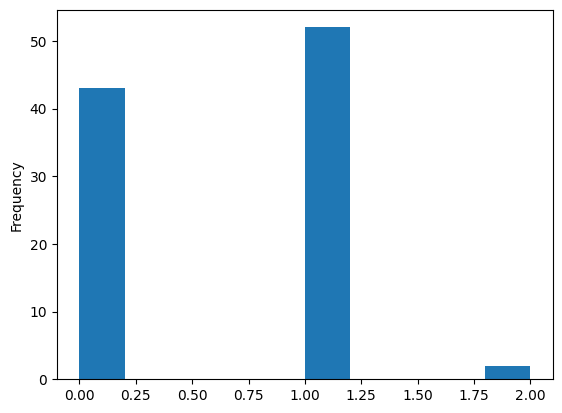

In [43]:
df_clean['embarked_dumm'][(df_clean['pclass']==1) & (df_clean['sex_male']==0) & (df_clean['parch']==0)].plot.hist();

In [44]:
for i, boleano in enumerate(df_clean['fare'].isnull()):
    if boleano == True:
        print(df_clean.iloc[i])
        df_clean.loc[i, 'fare'] = 7.925

pclass            3.0
survived          0.0
sibsp             0.0
parch             0.0
fare              NaN
sex_male          1.0
embarked_dumm     0.0
age_class_dumm    1.0
Name: 1225, dtype: float64


In [45]:
np.median(df_clean['fare'][(df_clean['pclass']==3) & (df_clean['embarked_dumm']==0) & (df_clean['parch']==0)])

7.925

 ---------------
 ## Divisão dos dados em treino e teste

In [46]:
# dados de entrada
X = df_clean.drop(['survived'], axis=1)
y = df_clean['survived']

X, y

(      pclass  sibsp  parch      fare  sex_male  embarked_dumm  age_class_dumm
 0          1      0      0  211.3375         0            0.0             1.0
 1          1      1      2  151.5500         1            0.0             0.0
 2          1      1      2  151.5500         0            0.0             0.0
 3          1      1      2  151.5500         1            0.0             1.0
 4          1      1      2  151.5500         0            0.0             1.0
 ...      ...    ...    ...       ...       ...            ...             ...
 1304       3      1      0   14.4542         0            1.0             1.0
 1305       3      1      0   14.4542         0            1.0             1.0
 1306       3      0      0    7.2250         1            1.0             1.0
 1307       3      0      0    7.2250         1            1.0             1.0
 1308       3      0      0    7.8750         1            0.0             1.0
 
 [1309 rows x 7 columns],
 0       1
 1       1
 2

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Treinamento de florestas aleatórias sem nenhum processamento

In [48]:
rfc = RandomForestClassifier()

In [49]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
y_pred_X_train = rfc.predict(X_train)

In [51]:
print(f'Métricas de avaliação predição X_train:\n{classification_report(y_train, y_pred_X_train)}')

Métricas de avaliação predição X_train:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       665
           1       0.92      0.88      0.90       382

    accuracy                           0.93      1047
   macro avg       0.92      0.92      0.92      1047
weighted avg       0.93      0.93      0.93      1047



#### Observações: 
 - Os resultados das métricas de avaliação mostraram que o algortimo aprendeu bem com os dados de treino e consegue ter um desempenho significativamente alto na predição dos próprios dados que ele usou para aprender;
 - A imperfeição na predição dos dados de treino signfica uma boa generalização dos dados, o que possibilida o acerto de informaçoes desconhecidas. Ou seja, não sofreu overfitting;

In [52]:
y_pred = rfc.predict(X_test)

In [53]:
avaliacao = classification_report(y_test, y_pred)
print(f'Métricas de avaliação predição X_test:\n{avaliacao}')

Métricas de avaliação predição X_test:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       144
           1       0.75      0.69      0.72       118

    accuracy                           0.76       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.76      0.76      0.75       262



### Validação cruzada

In [54]:
# Define o objeto de validação cruzada estratificada
#cv_strat = StratifiedKFold(n_splits=10)

# Realiza a validação cruzada estratificada
scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')

# Imprime a média dos scores e o desvio padrão
print(f"Acurácia média: {np.mean(scores):.2%} ±{np.std(scores):.2%}")

Acurácia média: 74.56% ±7.50%


#### Observações: 
 - O modelo obteve uma ótima acurácia geral, de 76%, e uma boa capacidade de generalização.
 - A precisão e o recall para ambas classes foram muito próximas, o que signfica que falsos positivos e negativos estão equilibrados. Até por isso, que o f1_score está muito próximo das outras duas métricas.
 - No geral, o aprendizado do modelo foi muito equilibrado para as duas classes, apesar de ter mais dados para a classe de não sobreviventes.
 
#### Ações:
 - Balancear os dados de treino;
 - Realizar uma pesquisa para os melhores parâmetros de treino;
 - Buscar as melhores features e resultados de pontuação de features;
 - Não tocar nos dados de teste
 --------------------------
 ## Processamendo de dados de treino
 ------------------
 ### Seleção de parâmetros

In [55]:
# função para dar uma facilitada na escolha dos parâmetros
def best_params(parametros, modelo, X, y):
    grid_search = RandomizedSearchCV(modelo, parametros, cv = 5, scoring='accuracy')
    grid_search = grid_search.fit(X, y)
    return grid_search.best_params_

In [56]:
rfc_params = {
    'n_estimators': [100, 300, 500],  # Número de árvores no modelo
    'criterion': ['gini', 'entropy'],  # Critério para avaliação da qualidade do split
    'max_depth': [None, 5, 10],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para realizar um split
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras em uma folha
    'max_features': ['sqrt', 'log2', None],  # Número máximo de features a serem consideradas para cada split
    'bootstrap': [True, False],  # Se amostras de bootstrap devem ser usadas para construir árvores
    'random_state': [0, 42, 100],  # Seed aleatória para reprodução dos resultados
}

In [57]:
rfc_bp = RandomForestClassifier(
                                random_state = 42,
                                n_estimators = 300,
                                min_samples_split = 10,
                                min_samples_leaf = 4,
                                max_features = 'log2',
                                max_depth = 10,
                                criterion = 'gini',
                                bootstrap = True
                                )

 ### Seleção de melhores features

In [58]:
rfe = RFE(rfc_bp, n_features_to_select=1 ,step=1).fit(X_train, y_train)

feature_name = rfe.feature_names_in_
ranking_order = rfe.ranking_

In [59]:
feature_ordem = {}
for i, name in enumerate(feature_name):
    feature_ordem[ranking_order[i]] = name

print('Ordem de principais features:')
best_features = []
for i in range(1,8):
    best_features.append(feature_ordem[i])
    print(f'{i}°: {feature_ordem[i]}')

Ordem de principais features:
1°: fare
2°: sex_male
3°: pclass
4°: parch
5°: sibsp
6°: age_class_dumm
7°: embarked_dumm


In [60]:
best_features[:5]

['fare', 'sex_male', 'pclass', 'parch', 'sibsp']

### Balanceamento de dados
-------------------
O balanceamento será realizado com a técnica de Random Over Sample, que coloca a classe minoritária igualada a classe marjoritária em quantidades de dados. Para isso, duplicará alguns dados aleatoriamente.

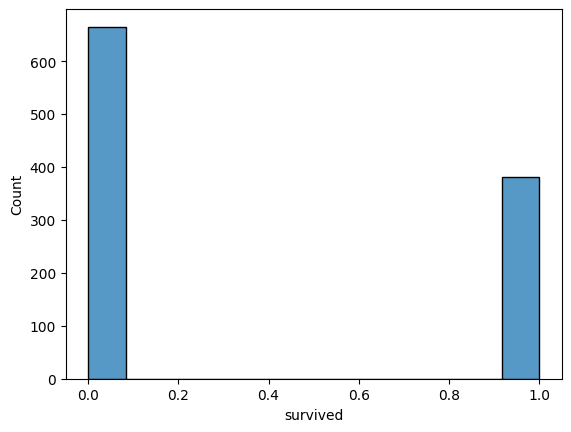

In [61]:
sns.histplot(data=y_train);

In [62]:
ros = RandomOverSampler()

In [63]:
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

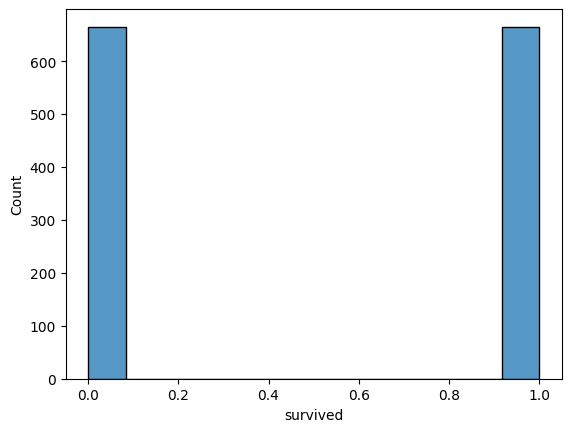

In [64]:
sns.histplot(data=y_train_ros);

## Treinamento de florestas aleatórias com melhores parâmetros e todas features, mas sem balanceamento

In [65]:
rfc_bp.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=300, random_state=42)

In [66]:
y_pred_X_train_sb = rfc_bp.predict(X_train)

In [67]:
print(f'Métricas de avaliação predição X_train:\n{classification_report(y_train, y_pred_X_train_sb)}')

Métricas de avaliação predição X_train:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       665
           1       0.87      0.71      0.78       382

    accuracy                           0.85      1047
   macro avg       0.86      0.82      0.84      1047
weighted avg       0.86      0.85      0.85      1047



In [68]:
y_pred_sb = rfc_bp.predict(X_test)

In [69]:
avaliacao_sb = classification_report(y_test, y_pred_sb)
print(f'Métricas de avaliação predição X_test:\n{avaliacao_sb}')

Métricas de avaliação predição X_test:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       144
           1       0.83      0.58      0.69       118

    accuracy                           0.76       262
   macro avg       0.78      0.74      0.75       262
weighted avg       0.77      0.76      0.75       262



- No geral, com os parâmetros do modelo teve uma piora nos resultados do que sem os parâmetros e as classes que tinham resultado de métricas mais próximos e "balanceados", sofreram algumas mudanças, como na piora do recall dos sobreviventes e aumento do recall dos que não sobreviveram.
- A acurácia geral manteve-se igual.

### Validação cruzada

In [70]:
# Define o objeto de validação cruzada estratificada
#cv_strat = StratifiedKFold(n_splits=10)

# Realiza a validação cruzada estratificada
scores = cross_val_score(rfc_bp, X, y, cv=10, scoring='accuracy')

# Imprime a média dos scores e o desvio padrão
print(f"Acurácia média: {np.mean(scores):.2%} ±{np.std(scores):.2%}")

Acurácia média: 76.69% ±8.74%


 - A generalização com a validação cruzada obteve cerca de0 ,5% a mais da acurácia geral do que com o modelo sem os melhores parâmetros.

## Treinamento de florestas aleatórias com todos processamentos

In [71]:
rfc_full = RandomForestClassifier(
                                random_state = 42,
                                n_estimators = 300,
                                min_samples_split = 10,
                                min_samples_leaf = 4,
                                max_features = 'log2',
                                max_depth = 10,
                                criterion = 'gini',
                                bootstrap = True
                                )

In [72]:
rfc_full.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=300, random_state=42)

In [73]:
y_pred_X_train_full = rfc_full.predict(X_train_ros)

In [74]:
print(f'Métricas de avaliação predição X_train_ros:\n{classification_report(y_train_ros, y_pred_X_train_full)}')

Métricas de avaliação predição X_train_ros:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       665
           1       0.88      0.82      0.85       665

    accuracy                           0.85      1330
   macro avg       0.85      0.85      0.85      1330
weighted avg       0.85      0.85      0.85      1330



In [75]:
y_pred_full = rfc_full.predict(X_test)

In [76]:
avaliacao_full = classification_report(y_test, y_pred_full)
print(f'Métricas de avaliação predição X_test:\n{avaliacao_full}')

Métricas de avaliação predição X_test:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       144
           1       0.77      0.69      0.73       118

    accuracy                           0.77       262
   macro avg       0.77      0.76      0.77       262
weighted avg       0.77      0.77      0.77       262



### Validação cruzada

In [77]:
X_full = pd.concat([X_train_ros, X_test])
y_full = pd.concat([y_train_ros, y_test])

In [78]:
# Define o objeto de validação cruzada estratificada
cv_strat = StratifiedKFold(n_splits=10)

# Realiza a validação cruzada estratificada
scores = cross_val_score(rfc_full, X_full, y_full, cv=cv_strat, scoring='accuracy')

# Imprime a média dos scores e o desvio padrão
print(f"Acurácia média: {np.mean(scores):.2%} ±{np.std(scores):.2%}")

Acurácia média: 79.90% ±2.41%


O modelo treinado com todos os processamentos foi o que obteve o melhor resultados na validação cruzada e isso será comparado no código abaixo.

In [79]:
print(f'Desempenho modelo sem processamento:\n\
{avaliacao}\n\n\
Desempenho modelo com melhores parâmetros:\n\
{avaliacao_sb}\n\n\
Desempenho modelo com todos processamentos:\n\
{avaliacao_full}')

Desempenho modelo sem processamento:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       144
           1       0.75      0.69      0.72       118

    accuracy                           0.76       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.76      0.76      0.75       262


Desempenho modelo com melhores parâmetros:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       144
           1       0.83      0.58      0.69       118

    accuracy                           0.76       262
   macro avg       0.78      0.74      0.75       262
weighted avg       0.77      0.76      0.75       262


Desempenho modelo com todos processamentos:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       144
           1       0.77      0.69      0.73       118

    accuracy                           0.77       262
  

Através somente do classification report, todas as avaliações estão muito similares. Portanto, o modelo treinado com todos processamentos será utilizado, pois foi o que obteve melhor desempenho na validação cruzada.

## Eu sobreviveria?

In [80]:
X_train.head(1)

,pclass,sibsp,parch,fare,sex_male,embarked_dumm,age_class_dumm
772,3,0,0,7.8958,1,0.0,1.0


In [81]:
# criação dos dados fictícios
eu_passageiro = {'pclass': 2,
                 'sibsp':0,
                 'parch':0,
                 'fare':26,
                 'sex_male':1,
                 'embarked_dumm':0,
                 'age_class_dumm':1}

In [82]:
X_eu = X_train.copy()

In [83]:
for coluna in X_eu:
    X_eu.loc[0, coluna] = eu_passageiro[coluna]

X_eu = X_eu[X_eu.index == 0]

In [84]:
vivo = 0
for i in range(1,11):
    y_pred_eu = rfc_full.predict(X_eu)
    if y_pred_eu == 1:
        vivo+=1

print(f'A chance de eu sobreviver é de {vivo} em {10}, ou seja, {vivo/10:.2%}')

A chance de eu sobreviver é de 0 em 10, ou seja, 0.00%


#### Infezlimente, as chances de eu ter sobrevivido no acidente do Titanic são nulas segundo o algoritmo classificador.